# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [15]:
import pandas as pd

In [16]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
32479   64         State-gov  222966       7th-8th              4   
7368    36  Self-emp-not-inc  135416  Some-college             10   
28406   66  Self-emp-not-inc   28061       7th-8th              4   
24964   44           Private  106698       HS-grad              9   
2947    18                 ?  297396       HS-grad              9   
17314   76                 ?   84755  Some-college             10   
19713   35         Local-gov  190964     Bachelors             13   
13967   50           Private  169925       HS-grad              9   
2930    21                 ?  230397  Some-college             10   
24399   29           Private   99369     Bachelors             13   

           marital-status       occupation   relationship   race     sex  \
32479  Married-civ-spouse    Other-service           Wife  Black  Female   
7368   Married-civ-spouse    Other-service           Wife  White  Female   
28406             Widowed  Farming-fishing      Unmarried  White    Male   
24964            Divorced    Other-service      Unmarried  White  Female   
2947        Never-married                ?      Own-child  White    Male   
17314             Widowed                ?      Unmarried  White  Female   
19713  Married-civ-spouse     Craft-repair        Husband  White    Male   
13967  Married-civ-spouse     Craft-repair        Husband  White    Male   
2930        Never-married                ?      Own-child  White  Female   
24399       Never-married   Prof-specialty  Not-in-family  Other  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
32479             0             0              40  United-States  <=50K  
7368              0             0              50  United-States  <=50K  
28406             0             0              50  United-States  <=50K  
24964             0             0              40  United-States  <=50K  
2947              0             0              10  United-States  <=50K  
17314             0             0              40  United-States  <=50K  
19713             0             0              40  United-States  <=50K  
13967             0             0              15  United-States  <=50K  
2930              0             0               5  United-States  <=50K  
24399             0             0              50  United-States  <=50K

In [17]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

# Data preparation

In [18]:
import pandas as pd

# Load preprocessed features from Task 1
X_train = pd.read_csv('X_train.csv')

print(X_train.shape)
X_train.head()


(15111, 88)


age    fnlwgt  education  education-num  income  workclass_local-gov  \
0  1.669831  0.275490          7              9       0                False   
1 -1.375689 -1.431223          7              9       0                False   
2 -0.868102  2.646309          4              6       0                False   
3 -0.529711 -0.276347          7              9       0                False   
4  0.316266 -0.301381          8             10       0                False   

   workclass_private  workclass_self-emp-inc  workclass_self-emp-not-inc  \
0               True                   False                       False   
1               True                   False                       False   
2               True                   False                       False   
3               True                   False                       False   
4               True                   False                       False   

   workclass_state-gov  ...  race_other  race_white  age_binned  \
0                False  ...       False        True           2   
1                False  ...       False        True           3   
2                False  ...       False        True           1   
3                False  ...       False        True           1   
4                False  ...       False        True           1   

   age_education_interaction  workclass_encoded  occupation_encoded  \
0                   0.892122           0.761184            0.081688   
1                  -1.198769           0.761184            0.025623   
2                  -1.392370           0.761184            0.025623   
3                  -0.617966           0.761184            0.046747   
4                   0.233878           0.761184            0.081688   

   continent_Europe  continent_North America  continent_Oceania  \
0             False                     True              False   
1             False                     True              False   
2             False                     True              False   
3             False                     True              False   
4             False                     True              False   

   continent_South America  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 88 columns]

In [19]:
# Convert boolean features to integers (0 and 1)
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)

print(X_train.dtypes.value_counts())  # Check if everything is numeric


C:\Users\Laura\AppData\Local\Temp\ipykernel_25004\2225991563.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)


int64      83
float64     5
Name: count, dtype: int64


In [20]:
selected_features = [
    'age', 'education-num', 'age_education_interaction'
]
X_selected = X_train[selected_features]


# K-Means Clustering

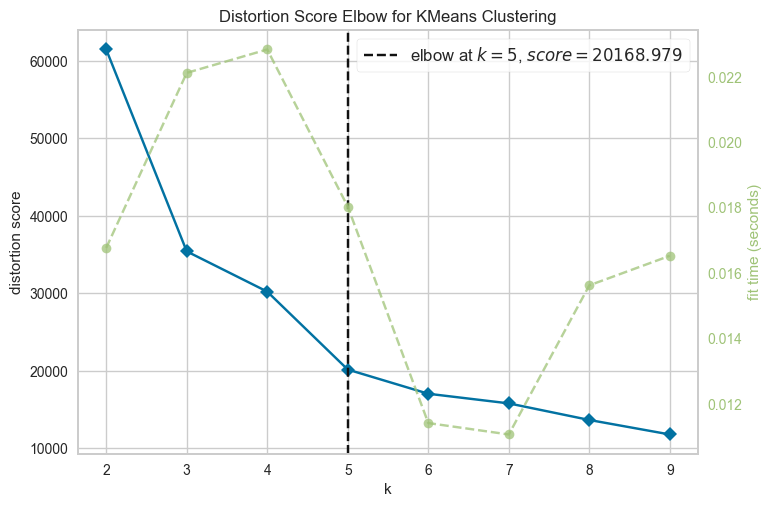

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Selecting minimal features
selected_features = [
    'age', 'education-num', 'age_education_interaction'
]

X_selected = X_train[selected_features]

# Visualizing optimal K with Elbow Method
model = KMeans(init='k-means++', random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=True)

visualizer.fit(X_selected) 
visualizer.show()


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fitting K-Means with optimal K
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_selected)

# Assigning cluster labels to the dataset
X_selected['cluster'] = clusters

# Evaluating the clustering
silhouette_avg = silhouette_score(X_selected.drop(columns=['cluster']), clusters)
print(f'Silhouette Score for K=5: {silhouette_avg:.4f}')

# Showing cluster distribution
cluster_counts = X_selected['cluster'].value_counts()
print(f'Cluster Distribution:\n{cluster_counts}')


C:\Users\Laura\AppData\Local\Temp\ipykernel_25004\2458468293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['cluster'] = clusters


Silhouette Score for K=5: 0.4457
Cluster Distribution:
cluster
4    5337
0    4159
3    2266
1    1761
2    1588
Name: count, dtype: int64


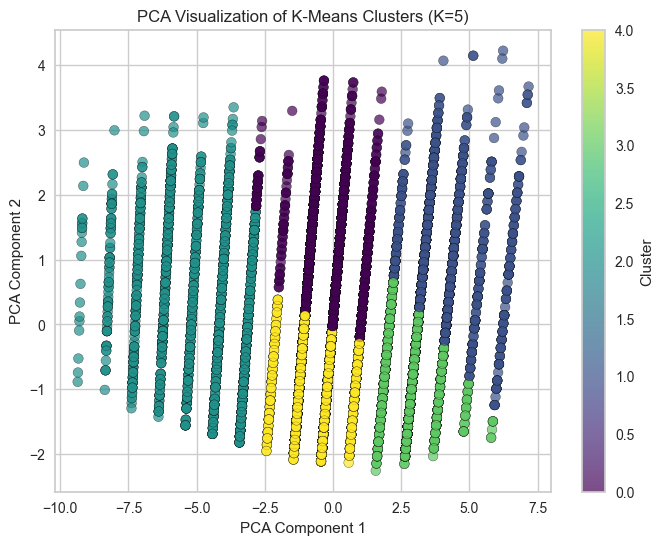

In [23]:
from sklearn.decomposition import PCA

# Dropping 'cluster' for PCA – we don’t want it as a feature
X_pca = X_selected.drop(columns=['cluster'])

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=X_selected['cluster'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('PCA Visualization of K-Means Clusters (K=5)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


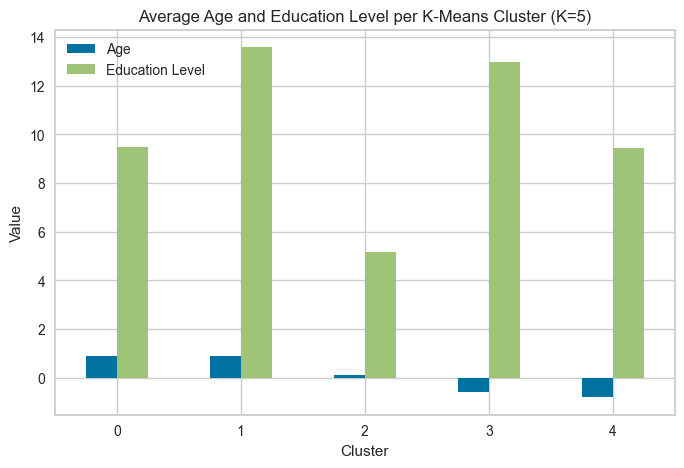

In [24]:
cluster_means = X_selected.groupby('cluster')[['age', 'education-num']].mean()

cluster_means.plot(kind='bar', figsize=(8, 5))
plt.title('Average Age and Education Level per K-Means Cluster (K=5)')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(['Age', 'Education Level'])
plt.show()

## Summary of K-Means Clustering

The K-Means model with K=5 clusters yielded a Silhouette Score of 0.4457, indicating moderate to good cluster separation, which is generally considered satisfactory for demographic and occupational data. Cluster sizes ranged from 1,588 to 5,337 observations, suggesting a reasonably balanced distribution across groups, with no single dominant cluster.
This indicates that the chosen number of clusters effectively captures distinct patterns within the dataset.

 The PCA plot revealed distinct groups, though structured segmentation suggests a strong influence from discrete education levels.

A cluster profile analysis revealed distinct patterns based on age and education level.
Cluster 0 represented younger individuals with moderate education, while Cluster 1 consisted of older, highly educated individuals, likely in senior roles.
Cluster 2 grouped the youngest individuals with the lowest education levels, suggesting students or early-stage workers.
Cluster 3 included older individuals with high education levels, representing experienced professionals, and Cluster 4 reflected a general workforce with moderate age and education.
This demonstrates that age and education strongly influence work-life patterns.

# Hierarchical Clustering

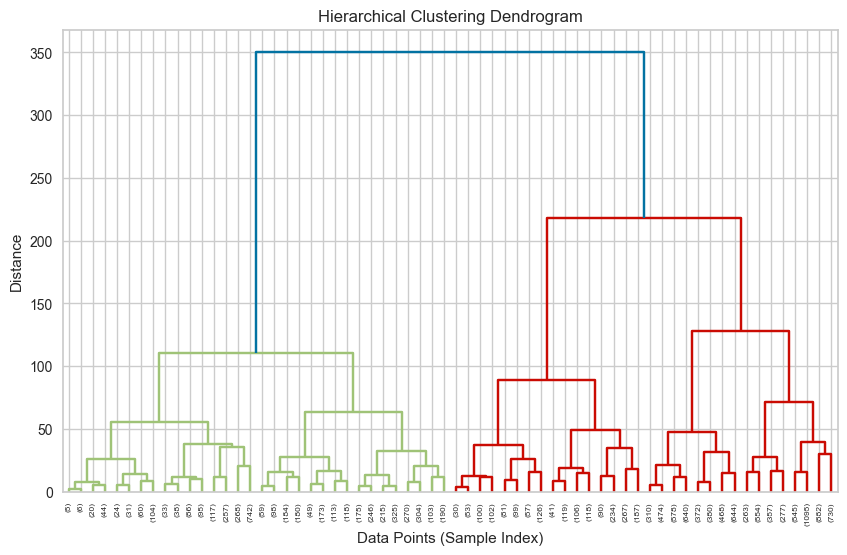

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering (Ward’s method for variance minimization)
linked = linkage(X_selected.drop(columns=['cluster']), method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5) 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points (Sample Index)')
plt.ylabel('Distance')
plt.show()


In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Hierarchical clustering with 5 clusters (based on dendrogram interpretation)
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_selected.drop(columns=['cluster']))

# Add to DataFrame
X_selected['hierarchical_cluster'] = hierarchical_labels

# Evaluate Silhouette Score
silhouette_hierarchical = silhouette_score(X_selected.drop(columns=['cluster', 'hierarchical_cluster']), hierarchical_labels)
print(f'Silhouette Score (Hierarchical, K=5): {silhouette_hierarchical:.4f}')

# Cluster distribution
print(X_selected['hierarchical_cluster'].value_counts())


C:\Users\Laura\AppData\Local\Temp\ipykernel_25004\2800419442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['hierarchical_cluster'] = hierarchical_labels


Silhouette Score (Hierarchical, K=5): 0.3838
hierarchical_cluster
1    4703
3    3866
2    2802
4    1930
0    1810
Name: count, dtype: int64


## Summary Hierarchical CLustering
Hierarchical Clustering (Ward’s linkage, K=5) yielded a Silhouette Score of 0.3838, suggesting weaker cluster separation despite producing similarly balanced clusters.
While Hierarchical Clustering provided a visual dendrogram for structural insights, K-Means demonstrated superior performance in cluster compactness and separation, making it the more effective approach for this dataset

# DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN with initial parameter guess
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_selected.drop(columns=['cluster', 'hierarchical_cluster']))

# Add cluster labels (-1 indicates noise)
X_selected['dbscan_cluster'] = dbscan_labels

# Filter out noise for silhouette score (DBSCAN assigns -1 to noise)
valid_points = X_selected['dbscan_cluster'] != -1
silhouette_dbscan = silhouette_score(
    X_selected.loc[valid_points, ['age', 'education-num', 'age_education_interaction']],
    X_selected.loc[valid_points, 'dbscan_cluster']
) if valid_points.sum() > 1 else -1

print(f'Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}')
print(X_selected['dbscan_cluster'].value_counts())


C:\Users\Laura\AppData\Local\Temp\ipykernel_25004\728093529.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['dbscan_cluster'] = dbscan_labels


Silhouette Score (DBSCAN): 0.2114
dbscan_cluster
 0     5341
 2     3228
 5     2500
 8      709
 11     705
 7      521
 3      434
 1      398
 4      282
 9      250
 13     179
 12     167
 6      157
 14     133
 10      75
-1       23
 15       9
Name: count, dtype: int64


## Summary DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) was applied to the dataset using eps=0.5 and min_samples=5 as initial parameters.
The algorithm identified 16 clusters and a small noise group of 23 points.
The Silhouette Score was 0.2114, indicating weak cluster separation and substantial overlap, suggesting that DBSCAN was less effective on this data compared to K-Means and Hierarchical Clustering.

DBSCAN produced many small clusters (e.g., Cluster 15 had only 9 samples), leading to poor cohesion. Only 23 samples were classified as noise (-1), indicating that the data is dense and does not contain substantial outliers.The low silhouette score suggests that the clusters are not well-separated

# Final Summary

The clustering analysis aimed to uncover patterns in working hours based on demographic and educational features.
K-Means clustering (K=5) emerged as the most effective approach, achieving a Silhouette Score of 0.4457, outperforming Hierarchical Clustering (0.3838) and DBSCAN (0.2114).
Clusters revealed meaningful patterns, particularly age and education levels driving segmentation, suggesting distinct work-life stages (e.g., young low-education workers, older high-education professionals).

Hierarchical Clustering provided structural insights but offered weaker cluster separation, while DBSCAN struggled with this globular demographic data, resulting in fragmented small clusters and a low performance score.
The bar plot visualization confirmed that K-Means clusters aligned with age-education patterns, justifying the selection of age, education-num, and age-education-interaction as primary features.

Ultimately, K-Means was chosen as the final model due to its robust performance, cluster interpretability, and alignment with domain knowledge about work patterns.